In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
material = nx.Material(id = "my_material",
                       composition = [["Fe", 2], ["O", 3]],
                       density = 5.24)

refractive_index = nx.ElectronicRefractiveIndex(material, 20e3)

print(refractive_index)

# k-vector along layer direction at an angle of 0.1 degree
kz = nx.conversions.EnergyToKvectorZ(20e3, 0.1)

scattering_factor = nx.ElectronicGrazingScatteringFactor(material, 20e3, kz)
print(scattering_factor)

(0.9999973883454211+4.5329294878545176e-08j)
(-1516637870.2120943+26323590.339101084j)


In [3]:
# scattering matrix at 57-Fe transition energy
mat_Fe = nx.Material.Template(nx.lib.material.Fe_enriched)

site1 = nx.Hyperfine(magnetic_field = 33)

mat_Fe.hyperfine_sites = [site1]

detuning = np.linspace(-100, 100, 5)

scattering_matrix = nx.ForwardScatteringMatrix(mat_Fe, nx.lib.moessbauer.Fe57, detuning)
print(np.squeeze(scattering_matrix))

[[[-4.79377469e+05 +24757.51704119j -3.29906733e+02 +22813.62949622j]
  [ 3.29906733e+02 -22813.62949622j -4.79377469e+05 +24757.51704119j]]

 [[-8.07493885e+05 +56710.19112392j -3.19735833e+04-327960.37172931j]
  [ 3.19735833e+04+327960.37172931j -8.07493885e+05 +56710.19112392j]]

 [[-5.32750529e+05 +31491.09334143j  0.00000000e+00 +60736.54132636j]
  [ 0.00000000e+00 -60736.54132636j -5.32750529e+05 +31491.09334143j]]

 [[-2.58007173e+05 +56710.19112252j  3.19735833e+04-327960.37172931j]
  [-3.19735833e+04+327960.37172931j -2.58007173e+05 +56710.19112252j]]

 [[-5.86123589e+05 +24757.51703838j  3.29906733e+02 +22813.62949622j]
  [-3.29906733e+02 -22813.62949622j -5.86123589e+05 +24757.51703838j]]]


[]

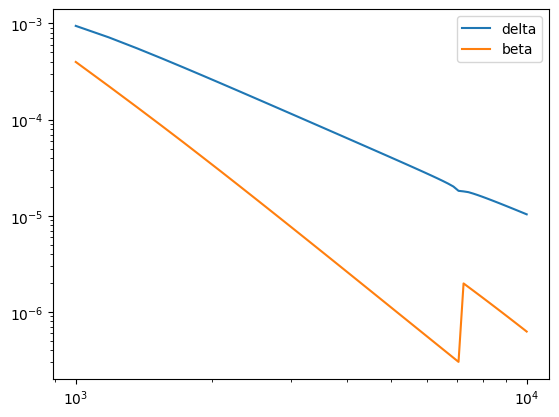

In [4]:
energies = np.linspace(1000, 10000)
refractive_index = []

for elem in energies:
    refractive_index.append(nx.ElectronicRefractiveIndex(material, elem))
    
plt.loglog(energies, 1 - np.real(refractive_index), label = "delta")
plt.loglog(energies, np.imag(refractive_index), label = "beta")
plt.legend()
plt.plot()